In [2]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import pickle;

In [3]:
df = pd.read_csv('palay.csv')
df.head()

landType            seedSystem croptype          seedType  \
0        Irrigated  Informal Seed System    Palay  Registered Seeds   
1           Upland    Formal Seed System    Palay  Registered Seeds   
2        Irrigated  Informal Seed System    Palay  Registered Seeds   
3  Rainfed Lowland    Formal Seed System    Palay  Registered Seeds   
4  Rainfed Lowland  Informal Seed System    Palay      Hybrid Seeds   

   harvestArea  prod  
0            4    10  
1            3     6  
2            2     3  
3            5     3  
4            4    10

In [4]:
df.shape

(29168, 6)

### 2. Data Pre-processing
* 2.1 Droppping duplicates

In [5]:
df = df.drop_duplicates()

In [6]:
df.shape

(900, 6)

In [7]:
df.dtypes

landType       object
seedSystem     object
croptype       object
seedType       object
harvestArea     int64
prod            int64
dtype: object

In [8]:
df.drop(['croptype'], axis = 1, inplace = True)
df.drop(['seedSystem'], axis = 1, inplace = True)

In [9]:
df.isnull().sum() 

landType       0
seedType       0
harvestArea    0
prod           0
dtype: int64

<AxesSubplot:>

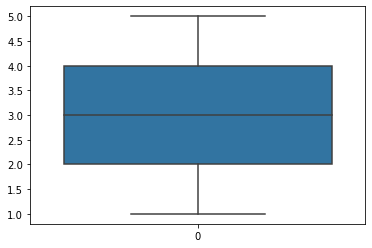

In [10]:
sns.boxplot(df['harvestArea'])

In [11]:
def removeOutliers(df,col):
        q3 = df[col].quantile(0.75);
        q1 = df[col].quantile(0.25);
        iqr = q3 - q1;
        
        max_ = q3 + (iqr * 1.5);
        min_ = q1 - (iqr * 1.5);
        
        df.loc[df[col] >= max_,col] = max_;
        df.loc[df[col] <= min_,col] = min_;

In [12]:
removeOutliers(df,'harvestArea')

<AxesSubplot:>

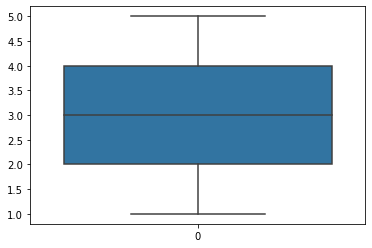

In [13]:
sns.boxplot(df['harvestArea'])

<AxesSubplot:>

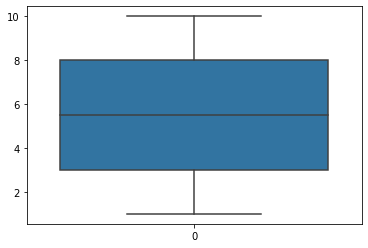

In [14]:
sns.boxplot(df['prod'])

In [15]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder();

df_new = df.copy();
df_new

landType          seedType  harvestArea  prod
0           Irrigated  Registered Seeds            4    10
1              Upland  Registered Seeds            3     6
2           Irrigated  Registered Seeds            2     3
3     Rainfed Lowland  Registered Seeds            5     3
4     Rainfed Lowland      Hybrid Seeds            4    10
...               ...               ...          ...   ...
6274           Upland   Certified Seeds            5     9
6489           Upland   Certified Seeds            3    10
6874           Upland      Hybrid Seeds            3     6
7309           Upland      Hybrid Seeds            1     7
9809           Upland      Hybrid Seeds            2     9

[900 rows x 4 columns]

In [16]:
df['landType'].unique()

array(['Irrigated', 'Upland', 'Rainfed Lowland'], dtype=object)

In [17]:
# df['seedSystem'].unique()

In [18]:
df['seedType'].unique()

array(['Registered Seeds', 'Hybrid Seeds', 'Certified Seeds'],
      dtype=object)

In [19]:
df_new

landType          seedType  harvestArea  prod
0           Irrigated  Registered Seeds            4    10
1              Upland  Registered Seeds            3     6
2           Irrigated  Registered Seeds            2     3
3     Rainfed Lowland  Registered Seeds            5     3
4     Rainfed Lowland      Hybrid Seeds            4    10
...               ...               ...          ...   ...
6274           Upland   Certified Seeds            5     9
6489           Upland   Certified Seeds            3    10
6874           Upland      Hybrid Seeds            3     6
7309           Upland      Hybrid Seeds            1     7
9809           Upland      Hybrid Seeds            2     9

[900 rows x 4 columns]

In [20]:
enLT = encoder.fit(df_new['landType'])
# import pickle
with open('enLT.pkl', 'wb') as f:
    pickle.dump(enLT, f)

with open('enLT.pkl', 'rb') as f:
    landType_loaded = pickle.load(f)

In [21]:
landType_loaded.transform(['Rainfed Lowland'])

array([1])

In [22]:
# enSS = encoder.fit(df_new['seedSystem'])

# # import pickle
# with open('enSS.pkl', 'wb') as f:
#     pickle.dump(enSS, f)
    
# with open('enSS.pkl', 'rb') as f:
#     seedSystem_loaded = pickle.load(f)

In [23]:
# seedSystem_loaded.transform(['Informal Seed System'])

In [24]:
enST = encoder.fit(df_new['seedType'])

# import pickle
with open('enST.pkl', 'wb') as f:
    pickle.dump(enST, f)

with open('enST.pkl', 'rb') as f:
    seedType_loaded = pickle.load(f)

In [25]:
seedType_loaded.transform(['Certified Seeds'])

array([0])

In [26]:
df_new['seedType'] = encoder.fit_transform(df_new['seedType'])
df_new['landType'] = encoder.fit_transform(df_new['landType'])
# df_new['seedSystem'] = encoder.fit_transform(df_new['seedSystem'])

In [27]:
df_new

landType  seedType  harvestArea  prod
0            0         2            4    10
1            2         2            3     6
2            0         2            2     3
3            1         2            5     3
4            1         1            4    10
...        ...       ...          ...   ...
6274         2         0            5     9
6489         2         0            3    10
6874         2         1            3     6
7309         2         1            1     7
9809         2         1            2     9

[900 rows x 4 columns]

In [28]:
df_new.dtypes

landType       int32
seedType       int32
harvestArea    int64
prod           int64
dtype: object

In [29]:
from sklearn.preprocessing import MinMaxScaler

df_scaled = df_new.copy()
scaler = MinMaxScaler()

for col in df_scaled.columns:
    if (col != 'prod'):
        df_scaled[col] = scaler.fit_transform(df_scaled[col].values.reshape(-1,1));

In [30]:
df_scaled

landType  seedType  harvestArea  prod
0          0.0       1.0         0.75    10
1          1.0       1.0         0.50     6
2          0.0       1.0         0.25     3
3          0.5       1.0         1.00     3
4          0.5       0.5         0.75    10
...        ...       ...          ...   ...
6274       1.0       0.0         1.00     9
6489       1.0       0.0         0.50    10
6874       1.0       0.5         0.50     6
7309       1.0       0.5         0.00     7
9809       1.0       0.5         0.25     9

[900 rows x 4 columns]

<AxesSubplot:>

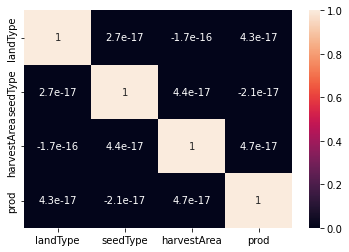

In [31]:
sns.heatmap(df_scaled.corr(),annot=True)

In [32]:
corr = df_scaled.corr();
corr_mask = corr.mask(np.triu(np.ones_like(corr, dtype=bool)))
corr_unstacked = corr_mask.unstack().sort_values(ascending = False);
corr_df = pd.DataFrame(corr_unstacked[abs(corr_unstacked)>.75]).sort_index()

corr_df

Empty DataFrame
Columns: [0]
Index: []

### Modelling

In [33]:
X = df_scaled.drop(['prod'],axis=1); #dropping the 'class' column or target variable 
y = df_scaled['prod']; #getting the target variable

In [34]:
from sklearn.model_selection import train_test_split #import the library
# stratify will balance the partition of the dataset for training and testing data
#the partition of the datasets are 80 percent in training data and 20 percent in test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=0.8)#, shuffle=True

In [35]:
from sklearn.metrics import r2_score;
from sklearn.metrics import mean_absolute_error;
from sklearn.metrics import mean_squared_error;

def evaluateModel(model):
    y_pred = model.predict(X_test);
    print('R^2 Score : ', r2_score(y_test,y_pred));
    print('Mean Absolute Error : ',mean_absolute_error(y_test,y_pred));
    print('RSME : ',np.sqrt(mean_squared_error(y_test,y_pred)))
    
    plt.scatter(y_train, model.predict(X_train),color='g')
    plt.plot(y_pred,y_pred)
    plt.show()

* 3.3.1 GradientBoostingRegressor

R^2 Score :  -0.08221416703714213
Mean Absolute Error :  2.5928926133773778
RSME :  2.9603880237258933


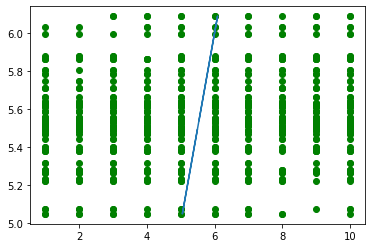

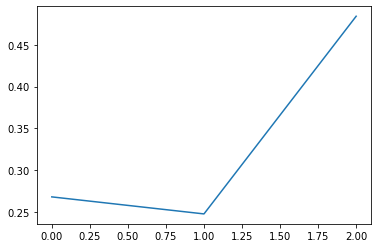

In [36]:
from sklearn.ensemble import GradientBoostingRegressor;

gbr = GradientBoostingRegressor();
gbr.fit(X_train,y_train);
evaluateModel(gbr);
plt.plot(gbr.feature_importances_)

* 3.3.2 Random Forest Regressor

R^2 Score :  -0.11633373309736528
Mean Absolute Error :  2.63336626594979
RSME :  3.006692784215389


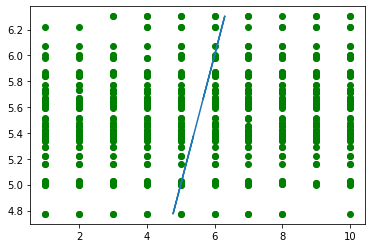

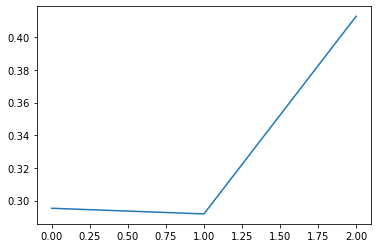

In [37]:
from sklearn.ensemble import RandomForestRegressor;


rf = RandomForestRegressor();
rf.fit(X_train,y_train);
evaluateModel(rf);

plt.plot(rf.feature_importances_)

* 3.3.3 ElasticNet

R^2 Score :  -0.005722876068587901
Mean Absolute Error :  2.5106327160493827
RSME :  2.8538503474351202


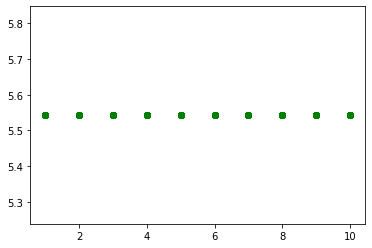

In [38]:
from sklearn.linear_model import ElasticNet;

en = ElasticNet();
en.fit(X_train,y_train);
evaluateModel(en);

* 3.3.4 SGDRegressor

R^2 Score :  -0.02126890607558174
Mean Absolute Error :  2.523684818977415
RSME :  2.8758225570872775


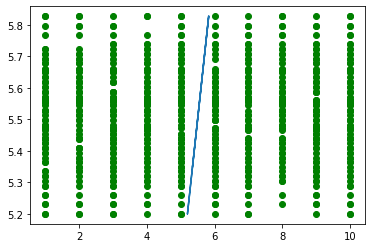

In [39]:
from sklearn.linear_model import SGDRegressor;

sgd = SGDRegressor();
sgd.fit(X_train,y_train);
evaluateModel(sgd);

* 3.3.5 BayesianRidge

R^2 Score :  -0.005760568400320354
Mean Absolute Error :  2.5106696205571724
RSME :  2.8539038250226008


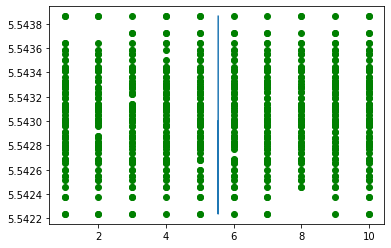

In [40]:
from sklearn.linear_model import BayesianRidge;

br = BayesianRidge();
br.fit(X_train,y_train);
evaluateModel(br);

* 3.3.6 LinearRegression

R^2 Score :  -0.017934849249656937
Mean Absolute Error :  2.5210832347758196
RSME :  2.8711244829586042


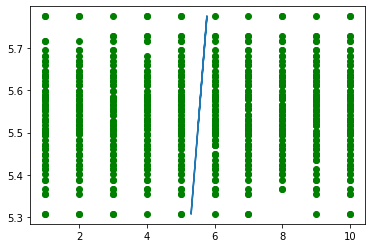

In [41]:
from sklearn.linear_model import LinearRegression;

r = LinearRegression();
r.fit(X_train, y_train);
evaluateModel(r)

* 3.3.7 XGB Regressor

R^2 Score :  -0.12054098282907999
Mean Absolute Error :  2.635734783278571
RSME :  3.0123532828045225


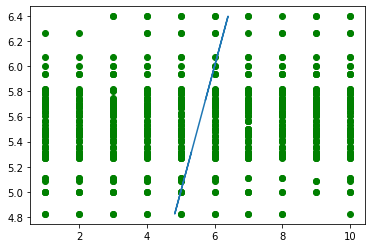

In [42]:
from xgboost import XGBRegressor;

xgb = XGBRegressor()
xgb.fit(X_train, y_train)
evaluateModel(xgb)

* 3.3.8 LGBM Regressor

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000057 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11
[LightGBM] [Info] Number of data points in the train set: 720, number of used features: 3
[LightGBM] [Info] Start training from score 5.543056
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

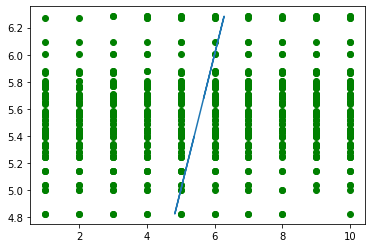

In [43]:
from lightgbm import LGBMRegressor;

lg = LGBMRegressor()
lg.fit(X_train, y_train)
evaluateModel(lg)

R^2 Score :  -0.01780722367571297
Mean Absolute Error :  2.5209865054894554
RSME :  2.8709444908911217


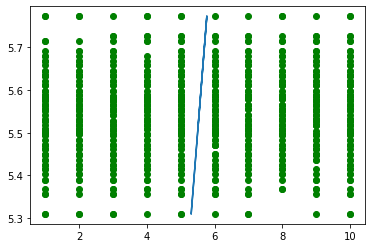

In [44]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

evaluateModel(ridge)

In [65]:
with open('palayModel.pkl', 'wb') as f:
    pickle.dump(rf, f)
    
with open('palayModel.pkl', 'rb') as f:
    palaymodel = pickle.load(f)

In [66]:
print(palaymodel)

RandomForestRegressor()


In [67]:
st = seedType_loaded.transform(['Registered Seeds'])
print(st)
# ss = seedSystem_loaded.transform(['Formal Seed System'])
# print(ss)
lt = landType_loaded.transform(['Upland'])
print(lt)

[2]
[2]


In [68]:
area= 3

In [69]:
st = float(st)  # Convert st to a float
lt = float(lt)  # Convert lt to a float
area = float(area)  

In [70]:
params = [[st, lt, area]]
pred = palaymodel.predict(params)
print(pred)

[6.07145597]
